# Dataset: Netflix Titles
# Task:-
# 1. Identify top 10 most frequent genres
# 2. Compare Movies vs TV show distribution
# 3. Analyze content added per year
# 4. Identify country producing most content

In [ ]:
  import numpy as np
  import pandas as pd
  import matplotlib.pyplot as plt
  import seaborn as sns


In [ ]:
dataset = pd.read_csv('/content/titles.csv')
dataset.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7


In [ ]:
dataset.shape

(5806, 15)

# 1. Identify top 10 most frequent genres

In [ ]:
# 3. Convert string list to actual Python list
dataset['genres'] = dataset['genres'].apply(eval)

In [ ]:
dataset.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,[documentation],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"[crime, drama]",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"[comedy, fantasy]",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,[comedy],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,[horror],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7


In [ ]:
# 4. Explode genres so that each genre gets its own row
genres_exploded = dataset.explode('genres')
genres_exploded.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,documentation,['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,crime,['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,drama,['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,comedy,['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,fantasy,['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8


In [ ]:
genres_exploded.dropna()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
5,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,comedy,['GB'],4.0,tt0063929,8.8,72895.0,12.919,8.3
5,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,european,['GB'],4.0,tt0063929,8.8,72895.0,12.919,8.3
29,ts45948,Monty Python's Fliegender Zirkus,SHOW,Monty Python's Fliegender Zirkus consisted of ...,1972,TV-MA,43,comedy,[],1.0,tt0202477,8.1,2144.0,1.490,7.0
47,ts20681,Seinfeld,SHOW,A stand-up comedian and his three offbeat frie...,1989,TV-PG,24,comedy,['US'],9.0,tt0098904,8.9,302700.0,128.743,8.3
55,ts22082,Knight Rider,SHOW,"Michael Long, an undercover police officer, is...",1982,TV-PG,51,action,['US'],4.0,tt0083437,6.9,33760.0,44.378,7.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5770,ts307816,Korean Cold Noodle Rhapsody,SHOW,"Refreshing and flavorful, naengmyeon is Korea’...",2021,TV-PG,49,documentation,['KR'],1.0,tt15772846,7.3,15.0,1.834,4.0
5785,ts273317,Pitta Kathalu,SHOW,"Four different women, four journeys of love an...",2021,TV-MA,37,drama,['IN'],1.0,tt13879000,5.1,727.0,1.400,5.5
5785,ts273317,Pitta Kathalu,SHOW,"Four different women, four journeys of love an...",2021,TV-MA,37,romance,['IN'],1.0,tt13879000,5.1,727.0,1.400,5.5
5796,ts286386,The Big Day,SHOW,"For six engaged couples, happily ever after be...",2021,TV-MA,45,reality,['US'],2.0,tt13887518,4.6,327.0,1.400,6.0


In [ ]:
# 5. Count frequency of each genre
top_10_genres = genres_exploded['genres'].value_counts().head(10)

In [ ]:
print(top_10_genres)

genres
drama            2901
comedy           2269
thriller         1178
action           1053
romance           958
documentation     910
crime             891
animation         665
fantasy           631
family            622
Name: count, dtype: int64


# 2. Compare Movies vs TV show distribution

In [ ]:
#create bar chart in between movies and tv show
dataset_copy = genres_exploded.copy()

In [ ]:
dataset_copy['type'].value_counts()

,count
type,
MOVIE,9031
SHOW,5595


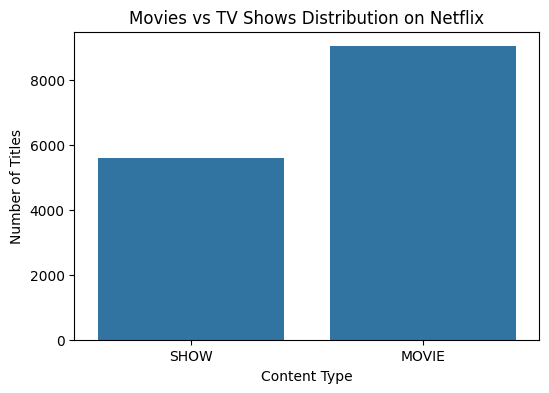

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='type', data=dataset_copy)
plt.xlabel("Content Type")
plt.ylabel("Number of Titles")
plt.title("Movies vs TV Shows Distribution on Netflix")
plt.show()


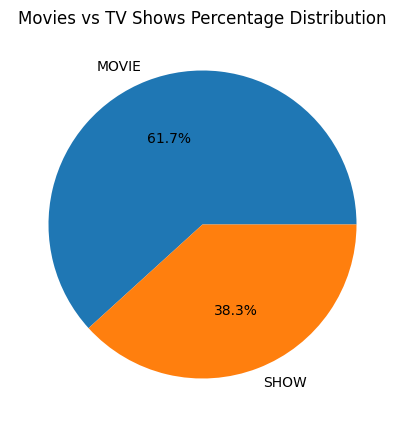

In [ ]:
plt.figure(figsize=(5,5))
dataset_copy['type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Movies vs TV Shows Percentage Distribution")
plt.ylabel("")
plt.show()


# Analyze content added per year

In [ ]:
content_per_year = dataset_copy['release_year'].value_counts().sort_index()

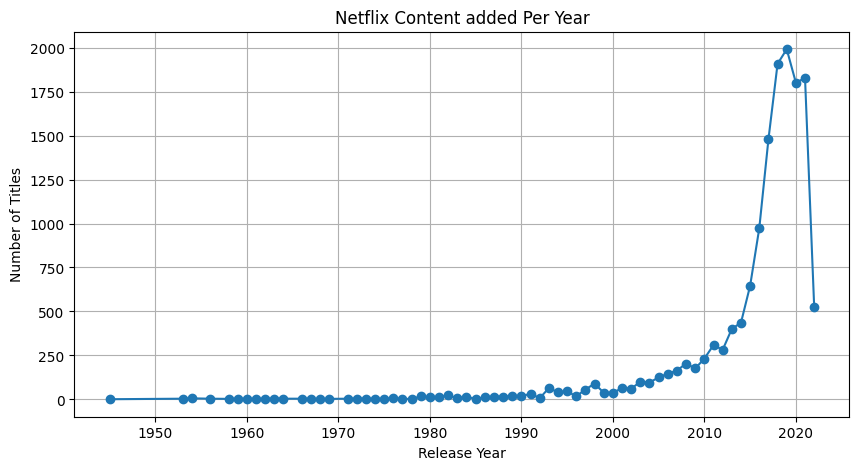

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(content_per_year.index, content_per_year.values, marker='o')
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.title("Netflix Content added Per Year")
plt.grid(True)
plt.show()


# Identify country producing most content

In [ ]:
# 1. String list -> actual list
dataset_copy['production_countries'] = dataset_copy['production_countries'].apply(eval)

In [ ]:
# 2. Explode countries
dataset_copy = dataset_copy.explode('production_countries')

In [ ]:
# 3. Drop null countries
dataset_copy = dataset_copy.dropna(subset=['production_countries'])

In [ ]:

# 4. Count country-wise content
dataset_copy = dataset_copy['production_countries'].value_counts()

In [ ]:

# 5. Most content producing country
top_country = dataset_copy.head(1)

In [ ]:
print(top_country)

production_countries
US    5743
Name: count, dtype: int64


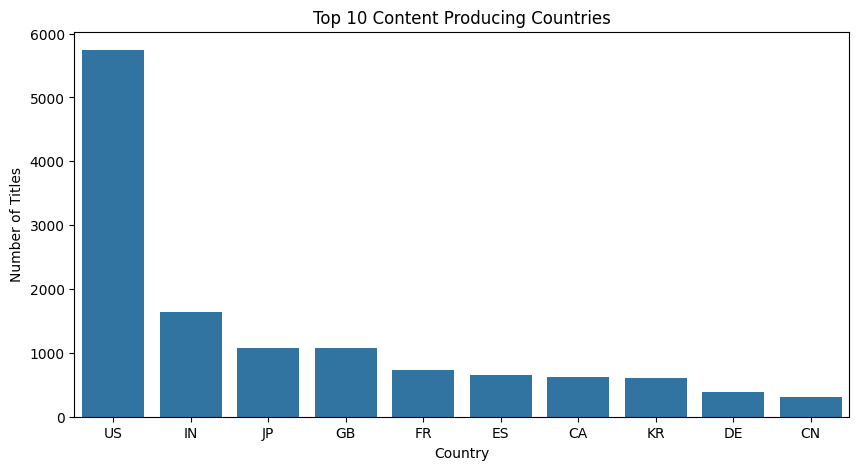

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# value_counts Series ko DataFrame me convert karo
country_df = dataset_copy.head(10).reset_index()
# Correctly rename columns by first providing enough names, then dropping the unwanted default index
country_df.columns = ['temp_index', 'country', 'count']
country_df = country_df.drop('temp_index', axis=1)

# Seaborn bar plot
plt.figure(figsize=(10,5))
sns.barplot(data=country_df, x='country', y='count')
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.title("Top 10 Content Producing Countries")
plt.show()

# Task
Convert the `dataset_copy` Series into a DataFrame with columns for country names and their counts, and then plot a bar chart of the top content-producing countries.

## Convert Series to DataFrame

### Subtask:
Transform the `dataset_copy` Series into a DataFrame, explicitly defining columns for country names and their counts, to be compatible with `sns.barplot`.


**Reasoning**:
The current `dataset_copy` is a Series, which causes a TypeError when used with `sns.barplot` as it expects a DataFrame. To resolve this, I need to convert the Series into a DataFrame and explicitly name the columns 'country' and 'count' as instructed.



In [ ]:
dataset_copy = dataset_copy.reset_index()
dataset_copy.columns = ['country', 'count']
dataset_copy.head()

,country,count
0,US,5743
1,IN,1635
2,JP,1078
3,GB,1073
4,FR,731


**Reasoning**:
Now that the `dataset_copy` is a DataFrame with 'country' and 'count' columns, I can proceed with plotting the bar chart to visualize the top content-producing countries.



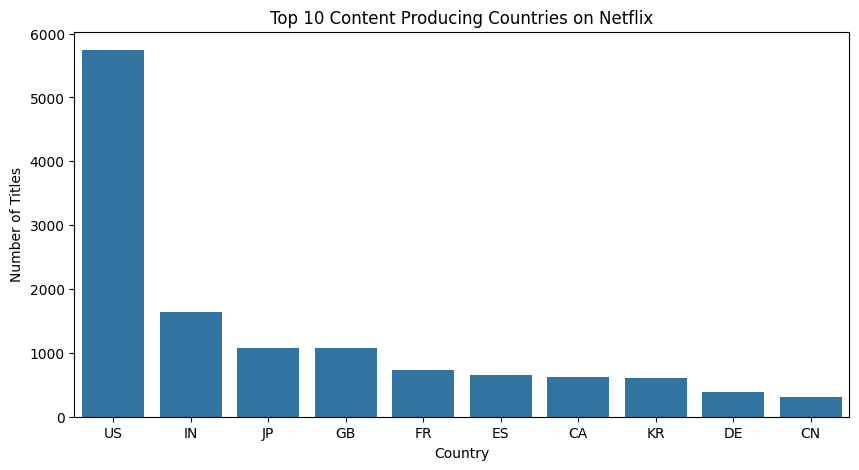

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=dataset_copy.head(10), x='country', y='count')
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.title("Top 10 Content Producing Countries on Netflix")
plt.show()

## Summary:

### Data Analysis Key Findings
*   The `dataset_copy` Series was successfully transformed into a DataFrame with two columns: 'country' and 'count'.
*   The top 5 content-producing countries on Netflix are: United States (US) with 5743 titles, India (IN) with 1635 titles, Japan (JP) with 1078 titles, United Kingdom (GB) with 1073 titles, and France (FR) with 731 titles.
*   A bar chart was successfully generated, visualizing the top 10 content-producing countries based on the transformed DataFrame.

### Insights or Next Steps
*   This structured data (country and count) allows for clear quantitative analysis and visualization of content production distribution across different countries.
*   The analysis could be extended to explore the types of content (e.g., movies vs. TV shows, genres) produced by these top countries to understand market trends or cultural preferences.
